# Module 4 - Model Development

Materia: Ciencia y Analítica de Datos
<br>
Alumno: Ricardo Morales Bustillos
<br>
Matrícula: A017400321

### Linear and Multiple regression

In [ ]:
# First the point are taken to train (fit) the model to get the parameters 
# The the parameters are used in the model
# predictions are denoted with y-hat


In [4]:
# Importación de librerías
from sklearn.linear_model import LinearRegression
import pandas as pd
lm = LinearRegression()

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(url)
df.info()

X = df[['highway-mpg']]
Y = df['price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [11]:
lm.fit(X, Y)
Yhat = lm.predict(X)
Yhat
lm.intercept_
lm.coef_

array([-821.73337832])

In [19]:
# Multiple linear regression
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
lm.fit(Z, df['price'])
Yhat2 = lm.predict(Z)
Yhat2
lm.intercept_
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Evalation using visualization

(0.0, 48180.070803609844)

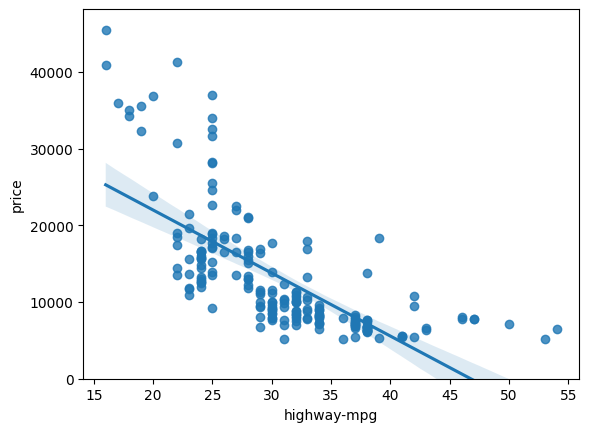

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df['highway-mpg'] 
y = df['price']
sns.regplot (x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

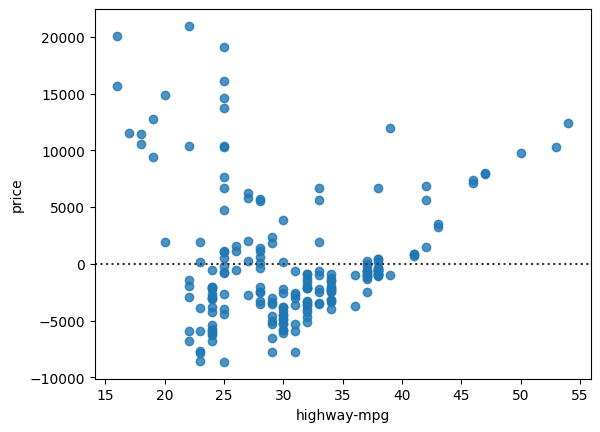

In [26]:
sns.residplot(data = df, x = 'highway-mpg', y = 'price')

c:\Users\Ricardo Morales\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


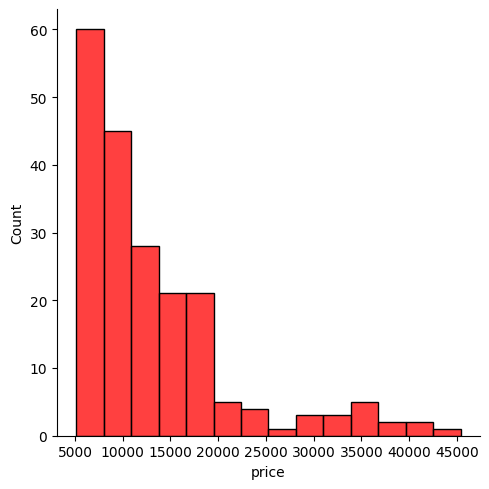

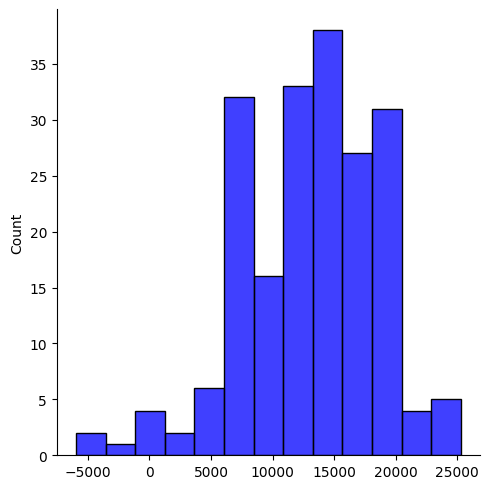

In [40]:
axl = sns.displot(df['price'], color='r', label='Actual Value')
sns.displot(Yhat,  color='b', label='Fitted Values', ax=axl)

### Polinomial regression

In [49]:
## useful in curvilineal relationships

import numpy as np

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [53]:
# polinomial regression with more than one dimension
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
x_poly = pr.fit_transform(df[['horsepower', 'curb-weight']])

In [55]:
x_poly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

In [58]:
# Pre-processing
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(df[['horsepower', 'curb-weight']])

x_scale = SCALE.transform(df[['horsepower', 'curb-weight']])
x_scale

array([[ 0.20375448, -0.01485764],
       [ 0.20375448, -0.01485764],
       [ 1.3574159 ,  0.51807951],
       [-0.03770954, -0.42376578],
       [ 0.31107182,  0.52001746],
       [ 0.17692514, -0.09431373],
       [ 0.17692514,  0.55877653],
       [ 0.17692514,  0.77195139],
       [ 0.9818052 ,  1.02776122],
       [-0.06453888, -0.31136449],
       [-0.06453888, -0.31136449],
       [ 0.47204783,  0.29909079],
       [ 0.47204783,  0.40567822],
       [ 0.47204783,  0.96768467],
       [ 2.10863729,  1.30682649],
       [ 2.10863729,  1.59751948],
       [ 2.10863729,  1.83976364],
       [-1.48649365, -2.06908811],
       [-0.89624827, -1.32103815],
       [-0.89624827, -1.25320978],
       [-0.94990694, -1.31716224],
       [-0.94990694, -1.31716224],
       [-0.03770954, -0.82879802],
       [-0.94990694, -1.14080849],
       [-0.94990694, -1.09817352],
       [-0.94990694, -1.09817352],
       [-0.03770954, -0.70670696],
       [-0.41332024, -0.04005103],
       [ 1.11595188,

### Measures for In-Sample Evaluation

In [63]:
# Mean Square Errors (MSE)
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], Yhat)

31635042.944639888

In [64]:
# R^2
lm.fit(X,Y)
lm.score(X,y)

0.4965911884339176

### Predictions and Decision making


In [73]:
new_input = np.arange(1,101,1).reshape(-1,1)
yhat = lm.predict(new_input)
yhat

array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  

### LAB

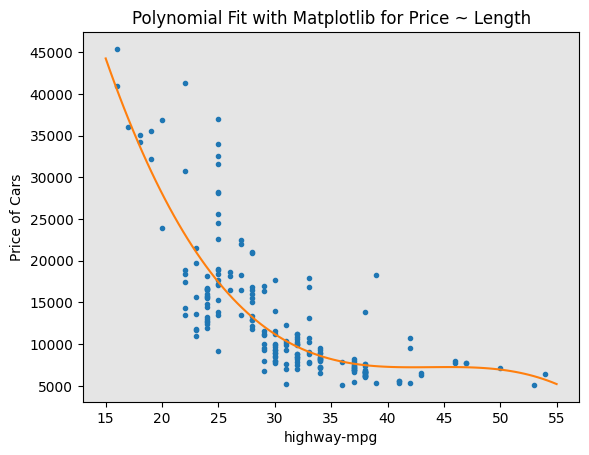

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


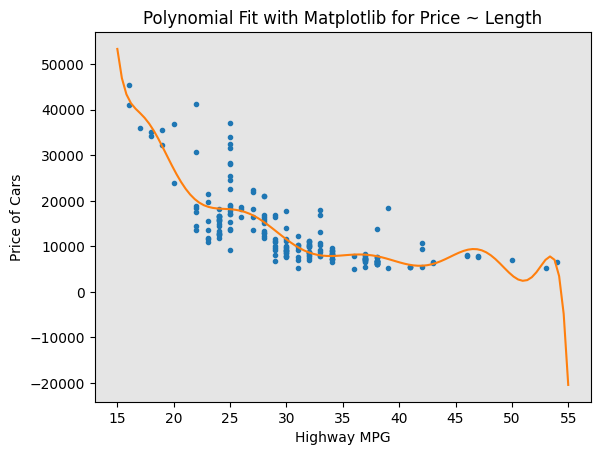

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [78]:
from sklearn.pipeline import Pipeline

# QUESTION 1-A
lm1 = LinearRegression()
lm1

# QUESTION 1-B
lm1.fit(df[['engine-size']], df[['price']])
lm1

# QUIESTION 1-C
lm1.coef_
lm1.intercept_

# QUESTION 1-D
Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*df['engine-size']
Price

# QUESTION 2-A
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

# QUESTION 3-A
df[["peak-rpm","highway-mpg","price"]].corr()

# QUESTION 4
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

PlotPolly(p, x, y, 'highway-mpg')

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

# QUESTION 5
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]